# Project : Gợi ý kiểm tra sản phẩm(hàng hóa, máy móc) định kỳ

<h1 align="center"> Import the required libraries</h1>


In [1]:
import pandas as pd
import ydata_profiling as pdpf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\nguye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h1 align="center"> Load & prepend dataset</h1>


In [2]:
# load the dataset
df = pd.read_csv('predictive_maintenance_dirty_dataset.csv')
df.head()

,Timestamp,Machine_ID,Temperature,Vibration,Pressure,Rotation_Speed,Failure
0,2025-08-01 00:33:00,PUMP_003,47.2 C,~2.26,314.738608,1534.211253,0
1,2025-08-01 01:08:00,PUMP_003,57.896064077536955,2.3837173645764542,NaN,NaN,0
2,2025-08-01 02:04:00,pump-001,51.20981135783017,1.043359877671101,292.750822,1485.942812,False
3,2025-08-01 03:02:00,PUMP_004,45.45987962239394,1.2938481493323541,324.656488,1494.355592,0
4,2025-08-01 03:25:00,PUMP_003,49.87772411252967,2.1777756585612162,314.170111,1520.811546,0


In [3]:
# total number of rows and columns
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Number of rows: 305, Number of columns: 7


<h1 align="center"> EDA</h1>


In [4]:
# What is the data type ?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       305 non-null    object 
 1   Machine_ID      305 non-null    object 
 2   Temperature     276 non-null    object 
 3   Vibration       275 non-null    object 
 4   Pressure        275 non-null    float64
 5   Rotation_Speed  275 non-null    float64
 6   Failure         305 non-null    object 
dtypes: float64(2), object(5)
memory usage: 16.8+ KB


In [5]:
# Are there any missing values?
df.isnull().sum()

Timestamp          0
Machine_ID         0
Temperature       29
Vibration         30
Pressure          30
Rotation_Speed    30
Failure            0
dtype: int64

In [6]:
# Are there any duplicate values?
df.duplicated().sum()

5

In [8]:
# overall descriptive information on numerical attributes
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pressure,275.0,287.944695,117.920940,-332.909426,304.206094,310.870352,316.576708,336.997141
Rotation_Speed,275.0,1985.144195,2550.864103,1432.366464,1481.506885,1499.848227,1521.278838,19145.486638


In [9]:
# overall descriptive information on categorical attributes
df_categorical = df.select_dtypes(include=[np.object_])
df_categorical.describe().transpose()

,count,unique,top,freq
Timestamp,305,300,2025-08-01 23:45:00,2
Machine_ID,305,4,pump-001,87
Temperature,276,272,52.81539436986286,2
Vibration,275,270,1.2337363290413395,2
Failure,305,5,0,238


In [3]:
print("\nKiểm tra phân phối nhãn 'Failure':")
print(df['Failure'].value_counts())
failure_ratio = df['Failure'].value_counts(normalize=True)
print("Tỉ lệ mỗi nhãn:", failure_ratio)

print("\nCác giá trị duy nhất của Machine_ID:")
print(df['Machine_ID'].unique())

print("\nKiểm tra phạm vi các cột số liệu:")
print(df.describe())


Kiểm tra phân phối nhãn 'Failure':
Failure
0        238
False     60
Error      3
1          3
True       1
Name: count, dtype: int64
Tỉ lệ mỗi nhãn: Failure
0        0.780328
False    0.196721
Error    0.009836
1        0.009836
True     0.003279
Name: proportion, dtype: float64

Các giá trị duy nhất của Machine_ID:
['PUMP_003' 'pump-001' 'PUMP_004' 'Pump_002']

Kiểm tra phạm vi các cột số liệu:
         Pressure  Rotation_Speed
count  275.000000      275.000000
mean   287.944695     1985.144195
std    117.920940     2550.864103
min   -332.909426     1432.366464
25%    304.206094     1481.506885
50%    310.870352     1499.848227
75%    316.576708     1521.278838
max    336.997141    19145.486638


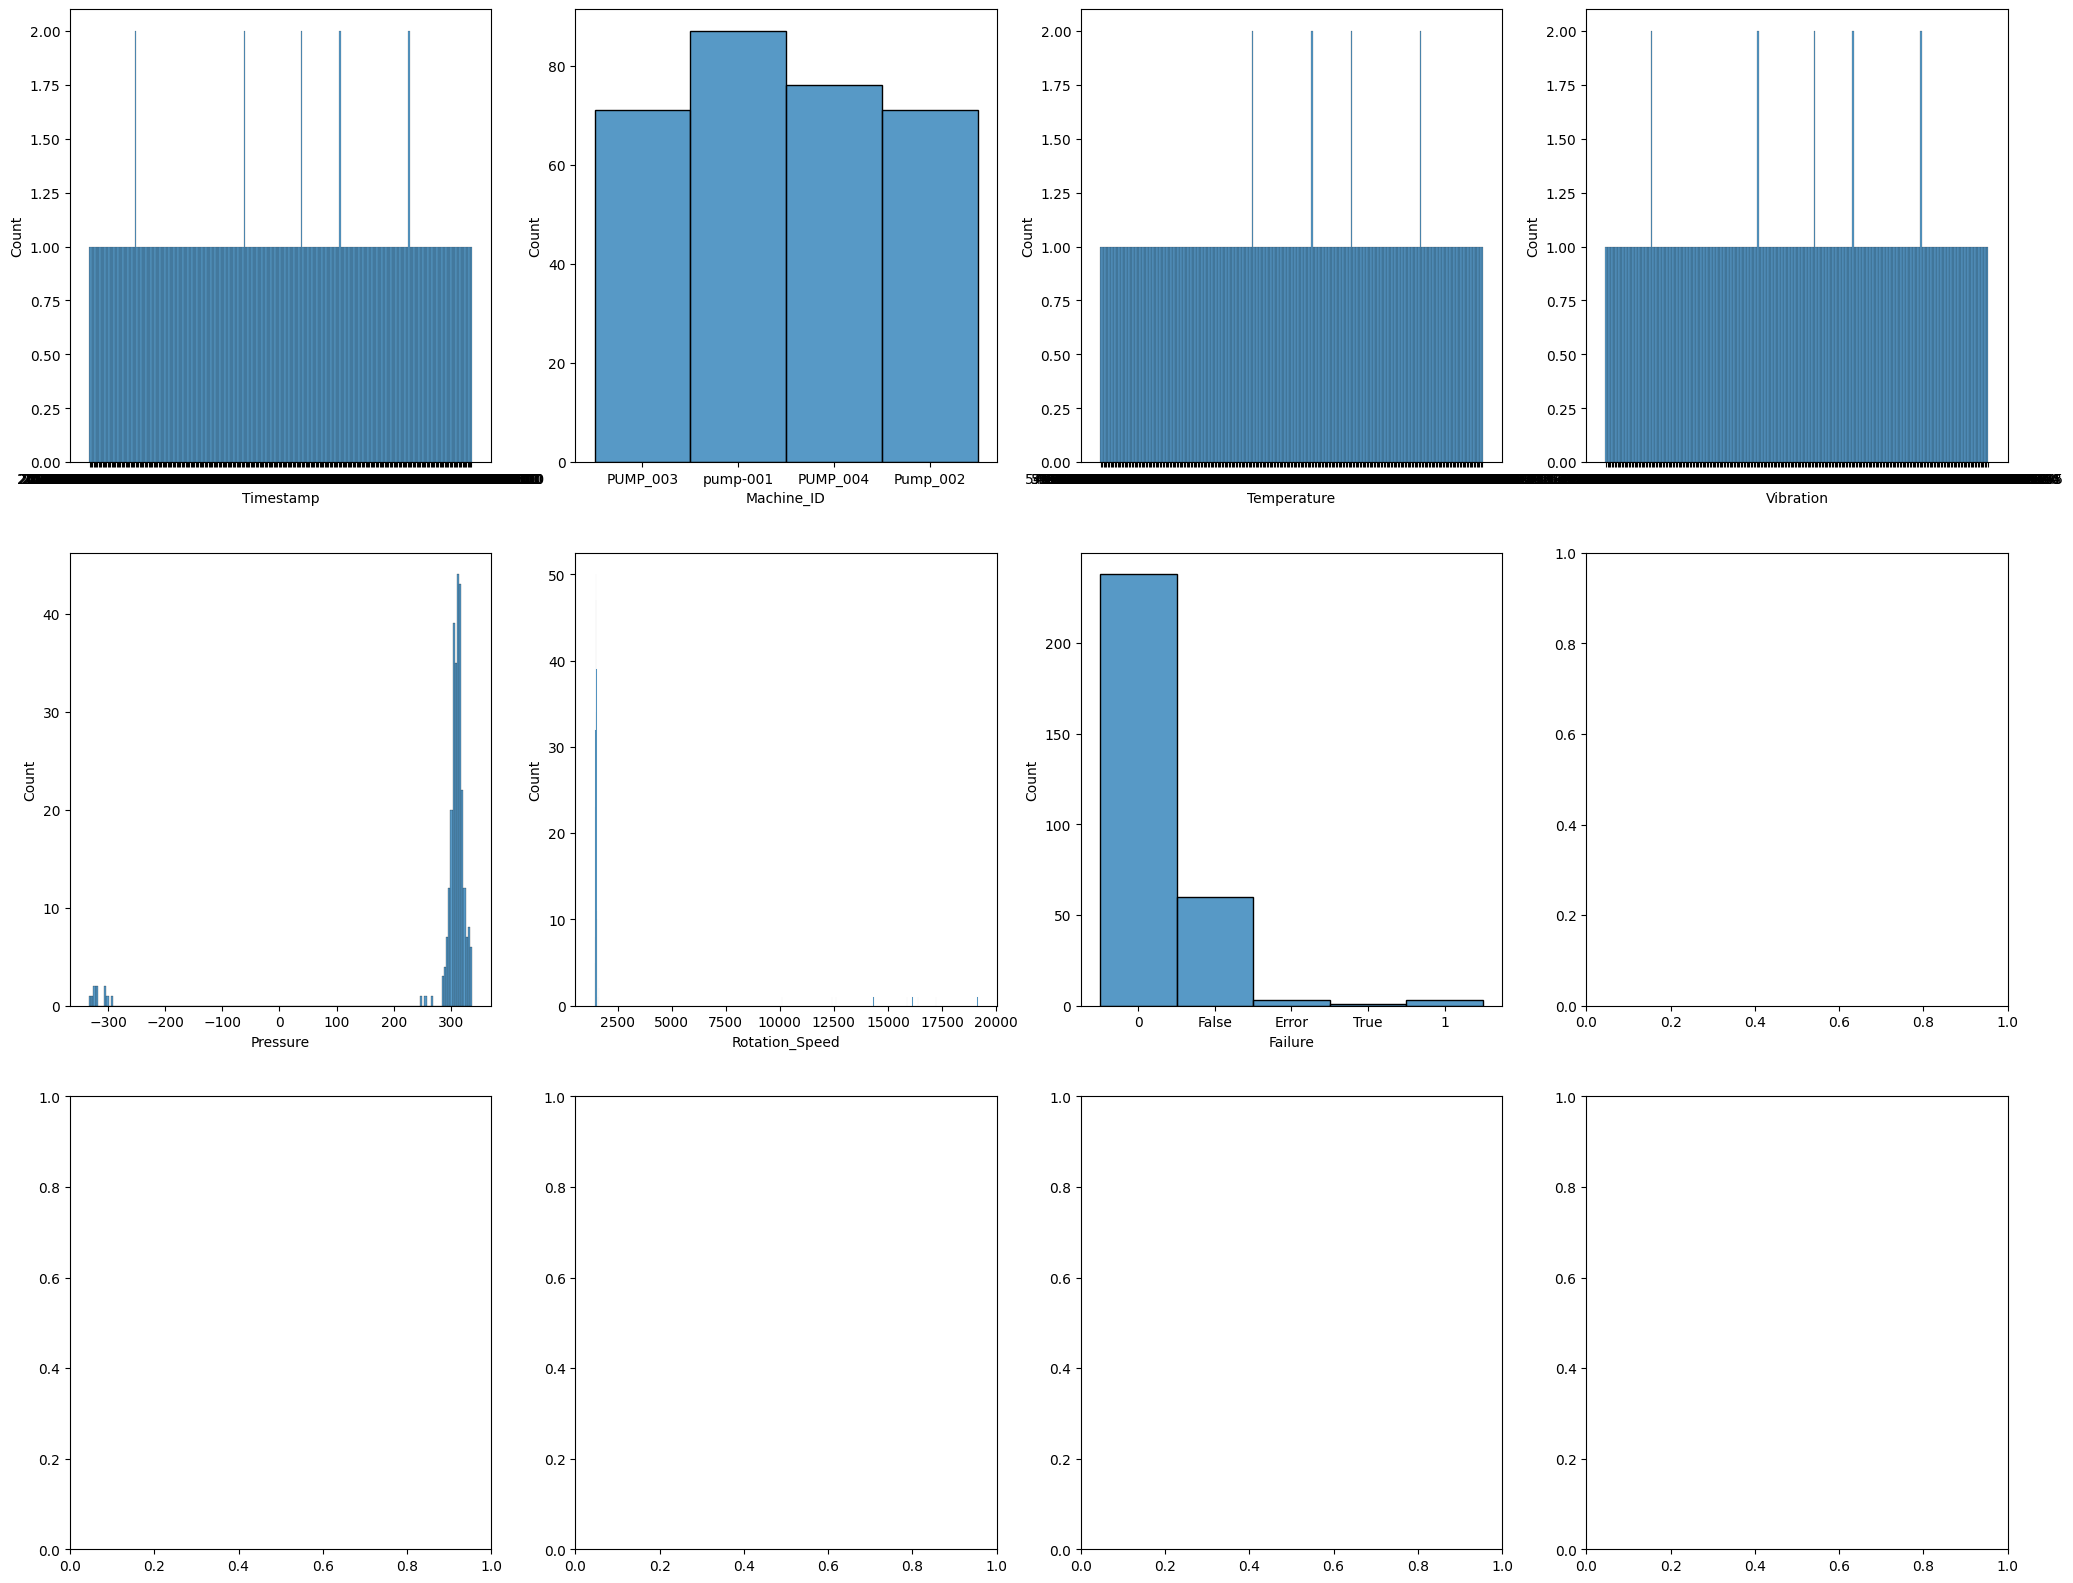

In [10]:
#check for outliers(chars)
fig, ax = plt.subplots(3, 4, figsize=(25, 20))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=ax[i//4][i%4])

In [11]:
#check for outliers
# Outliers for numerical data 
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Outliers in column {col}: {len(outliers)} values')
    if not outliers.empty:
        print(outliers[[col]])

# Outliers for string data (using unusual string length) 
str_cols = df.select_dtypes(include='object').columns
for col in str_cols:
    string_lengths = df[col].astype(str).apply(len)
    Q1, Q3 = string_lengths.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = df[(string_lengths < lower_bound) | (string_lengths > upper_bound)]
    print(f'Outliers (string length) in column {col}: {len(outliers)} values')
    if not outliers.empty:
        print(outliers[[col]])

Outliers in column Pressure: 17 values
       Pressure
10  -300.469722
17  -324.778940
20  -306.078918
42  -320.455712
66   285.434069
77  -302.981866
117 -327.723780
131 -294.442500
134  335.733598
143 -320.051022
165  335.977046
176 -322.056281
206  255.524500
207  248.065831
211  267.051920
230 -332.909426
264  336.997141
Outliers in column Rotation_Speed: 13 values
     Rotation_Speed
10     12420.220800
17     14340.209727
20     15894.539895
42     17234.478179
77     16376.882469
117    19145.486638
131    12587.116422
143    16132.916849
176    10090.541616
206     1639.505815
207     1637.743145
211     1582.159586
230    14344.033190
Outliers (string length) in column Timestamp: 0 values
Outliers (string length) in column Machine_ID: 0 values
Outliers (string length) in column Temperature: 125 values
            Temperature
0                47.2 C
1    57.896064077536955
5    39.866401921349535
9                   NaN
12   55.154997612479754
..                  ...
290  47.94

<h1 align="center">1. Cleaning data </h1>

In [24]:
def clean_machine_id(x):
    # Đưa về dạng PUMP_00X
    x = str(x).upper().replace("-", "_")
    x = re.sub(r"PUMP_0*(\d+)", r"PUMP_00\1", x)
    x = re.sub(r"PUMP_0{2,}", "PUMP_00", x)
    return x

def extract_number(val):
    if pd.isnull(val):
        return np.nan
    # Loại bỏ ký tự lạ, chữ cái (như "C", "~", khoảng trắng)
    match = re.search(r"-?\d+\.?\d*", str(val).replace(",", ""))
    return float(match.group()) if match else np.nan

def normalize_failure(val):
    if str(val).strip().lower() in ['1', 'true', "error"]:
        return 1
    return 0

def remove_outliers(s, n_std=3):
    # Loại giá trị ngoài n_std độ lệch chuẩn nếu là kiểu số
    if not pd.api.types.is_numeric_dtype(s):
        return s
    mean = s.mean()
    std = s.std()
    return s.where((s - mean).abs() <= n_std * std)

In [25]:
# Chuẩn hóa tên máy
import re
df['Machine_ID'] = df['Machine_ID'].apply(clean_machine_id)
# Làm sạch các trường số liệu
for col in ['Temperature', 'Vibration', 'Pressure', 'Rotation_Speed']:
    df[col] = df[col].apply(extract_number)
    df[col] = remove_outliers(df[col])

In [27]:
# Chuẩn hóa nhãn Failure
df['Failure'] = df['Failure'].apply(normalize_failure)

# Loại bỏ dòng trùng lặp hoàn toàn
df = df.drop_duplicates()

# Xử lý giá trị thiếu: loại bỏ nếu thiếu quá nhiều, còn lại điền giá trị trung bình
threshold = 2  # Nếu 2 trường trở lên bị thiếu sẽ loại dòng đó
df = df[df.isnull().sum(axis=1) <= threshold]
for col in ['Temperature', 'Vibration', 'Pressure', 'Rotation_Speed']:
    df[col] = df[col].fillna(df[col].mean())

In [28]:
#Xử lý đặc trưng thời gian
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek

In [29]:
# Kiểm tra và xử lý outlier bằng IQR
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

num_cols = ['Temperature', 'Vibration', 'Pressure', 'Rotation_Speed']
df = remove_outliers_iqr(df, num_cols)
# Xuất ra file mới
df.to_csv('maintenance_clean.csv', index=False)

<h1 align="center"> EDA phân tích sau sử lý </h1>

In [2]:
df = pd.read_csv('maintenance_clean.csv')
df.head()

,Timestamp,Machine_ID,Temperature,Vibration,Pressure,Rotation_Speed,Failure,Hour,Day,Month,DayOfWeek
0,2025-08-01 00:33:00,PUMP_003,47.200000,2.260000,314.738608,1534.211253,0,0,1,8,4
1,2025-08-01 01:08:00,PUMP_003,57.896064,2.383717,310.597470,1499.262482,0,1,1,8,4
2,2025-08-01 02:04:00,PUMP_001,51.209811,1.043360,292.750822,1485.942812,0,2,1,8,4
3,2025-08-01 03:02:00,PUMP_004,45.459880,1.293848,324.656488,1494.355592,0,3,1,8,4
4,2025-08-01 03:25:00,PUMP_003,49.877724,2.177776,314.170111,1520.811546,0,3,1,8,4


In [3]:
#kiểm tra sau cleaning
print("=== Thông tin tổng quan ===")
print("Số dòng, số cột:", df.shape)
print("Tên các cột:", df.columns.tolist())

print("\n=== Kiểm tra giá trị thiếu (NaN/null) ===")
print(df.isnull().sum())

print("\n=== Kiểm tra giá trị trùng lặp ===")
print("Số dòng trùng lặp:", df.duplicated().sum())

print("\n=== Kiểm tra kiểu dữ liệu từng cột ===")
print(df.dtypes)

print("\n=== Kiểm tra giá trị bất thường trong các cột số ===")
num_cols = ['Temperature', 'Vibration', 'Pressure', 'Rotation_Speed']
for col in num_cols:
    try:
        # Kiểm tra có phải toàn số hay không
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"{col}: Min={df[col].min()}, Max={df[col].max()}, Có {df[col].isnull().sum()} giá trị không phải số.")
    except Exception as e:
        print(f"Lỗi ở cột {col}: {e}")

print("\n=== Kiểm tra phân phối nhãn (Failure) ===")
print(df['Failure'].value_counts(dropna=False))

print("\n=== Kiểm tra giá trị duy nhất của Machine_ID ===")
print(df['Machine_ID'].unique())

print("\n=== Kiểm tra giá trị bất thường trong Timestamp ===")
try:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    print("Số giá trị Timestamp không hợp lệ:", df['Timestamp'].isnull().sum())
except Exception as e:
    print("Lỗi khi chuyển Timestamp:", e)

print("\n=== Kiểm tra các dòng có vấn đề ===")
problem_rows = df[df.isnull().any(axis=1)]
if not problem_rows.empty:
    print("Các dòng có vấn đề (giá trị thiếu hoặc kiểu dữ liệu lỗi):")
    print(problem_rows)
else:
    print("Không có dòng dữ liệu lỗi!")

=== Thông tin tổng quan ===
Số dòng, số cột: (246, 11)
Tên các cột: ['Timestamp', 'Machine_ID', 'Temperature', 'Vibration', 'Pressure', 'Rotation_Speed', 'Failure', 'Hour', 'Day', 'Month', 'DayOfWeek']

=== Kiểm tra giá trị thiếu (NaN/null) ===
Timestamp         0
Machine_ID        0
Temperature       0
Vibration         0
Pressure          0
Rotation_Speed    0
Failure           0
Hour              0
Day               0
Month             0
DayOfWeek         0
dtype: int64

=== Kiểm tra giá trị trùng lặp ===
Số dòng trùng lặp: 0

=== Kiểm tra kiểu dữ liệu từng cột ===
Timestamp          object
Machine_ID         object
Temperature       float64
Vibration         float64
Pressure          float64
Rotation_Speed    float64
Failure             int64
Hour                int64
Day                 int64
Month               int64
DayOfWeek           int64
dtype: object

=== Kiểm tra giá trị bất thường trong các cột số ===
Temperature: Min=36.76373560051246, Max=63.80380967863092, Có 0 giá trị

In [4]:
# Thống kê mô tả các biến số
print("=== Thống kê mô tả các trường số ===")
print(df.describe().transpose())

=== Thống kê mô tả các trường số ===
                count                           mean                  min  \
Timestamp         246  2025-08-04 18:39:28.048780544  2025-08-01 00:33:00   
Temperature     246.0                      49.663296            36.763736   
Vibration       246.0                       2.006808             0.759353   
Pressure        246.0                     310.927597           291.032528   
Rotation_Speed  246.0                     1500.29234          1442.879511   
Failure         246.0                        0.01626                  0.0   
Hour            246.0                      11.365854                  0.0   
Day             246.0                       4.284553                  1.0   
Month           246.0                            8.0                  8.0   
DayOfWeek       246.0                       3.186992                  0.0   

                                25%                  50%                  75%  \
Timestamp       2025-08-02 22:26:4

In [8]:
# Kiểm tra cân bằng dữ liệu nhãn
from collections import Counter
print("Tỉ lệ nhãn Failure:", Counter(df['Failure']))
print("Tỉ lệ %:", df['Failure'].value_counts(normalize=True))

Tỉ lệ nhãn Failure: Counter({0: 242, 1: 4})
Tỉ lệ %: Failure
0    0.98374
1    0.01626
Name: proportion, dtype: float64


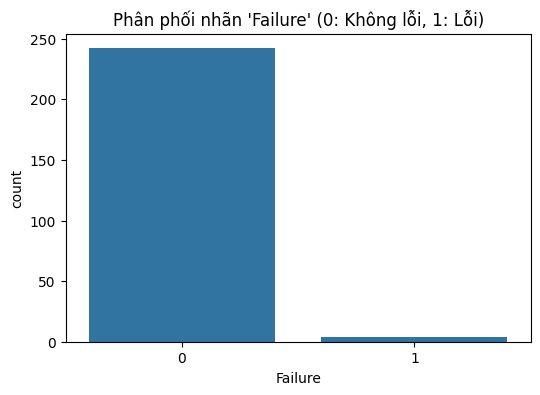

In [5]:
# Phân phối nhãn Failure
plt.figure(figsize=(6,4))
sns.countplot(x='Failure', data=df)
plt.title("Phân phối nhãn 'Failure' (0: Không lỗi, 1: Lỗi)")
plt.show()

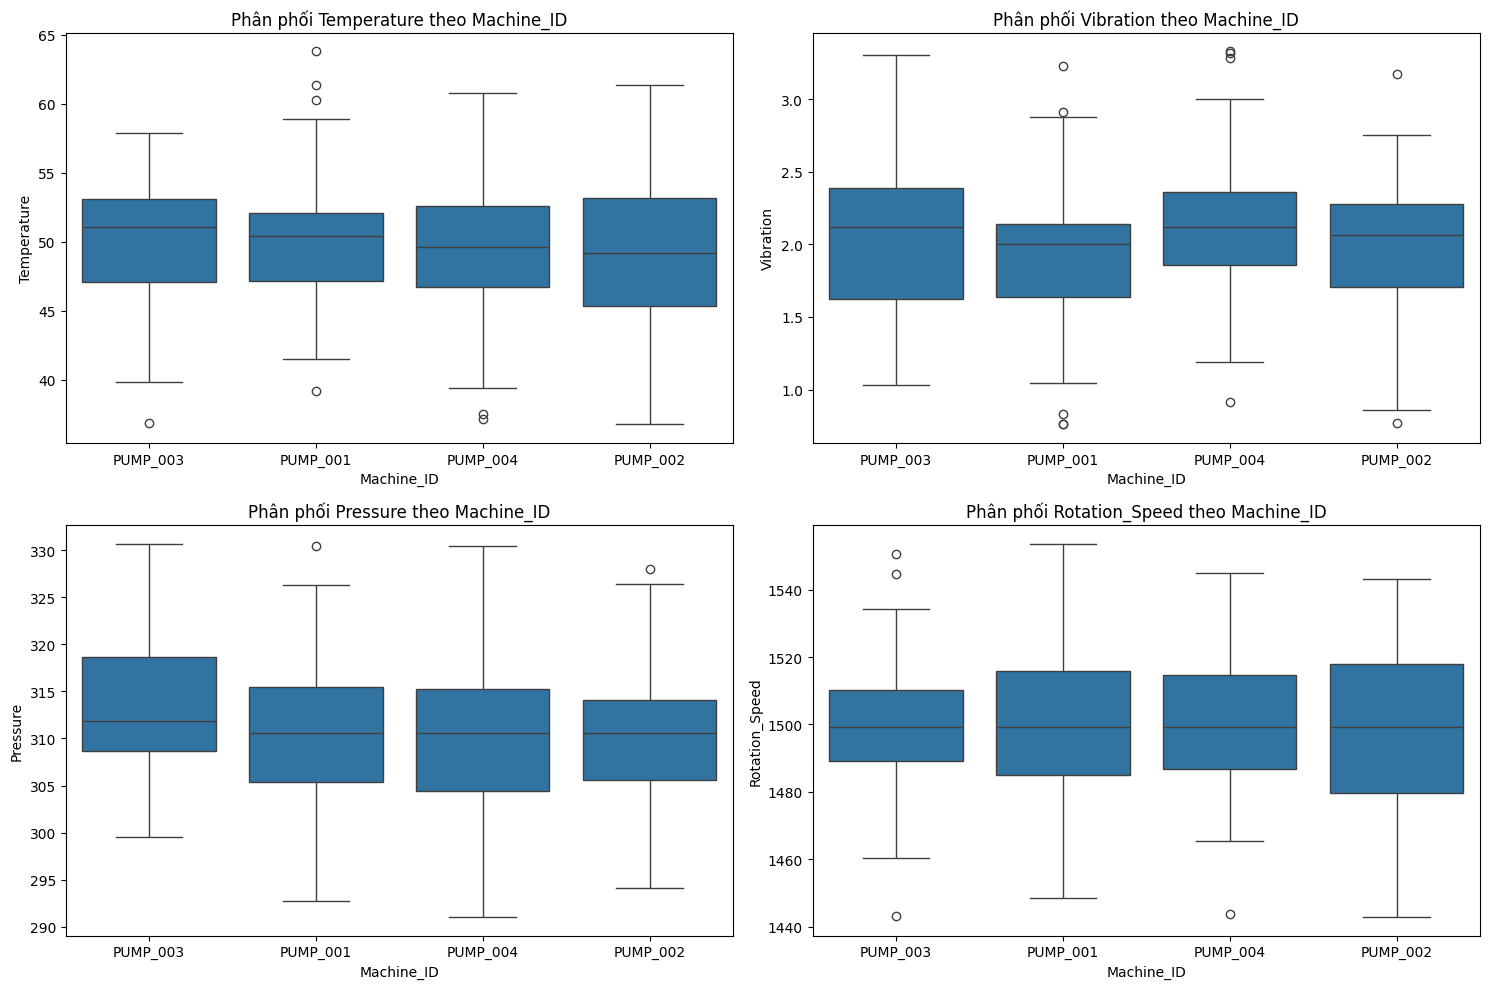

In [6]:
# Phân phối các trường số theo từng loại máy
fig, axs = plt.subplots(2, 2, figsize=(15,10))
num_cols = ['Temperature', 'Vibration', 'Pressure', 'Rotation_Speed']
for i, col in enumerate(num_cols):
    sns.boxplot(x='Machine_ID', y=col, data=df, ax=axs[i//2][i%2])
    axs[i//2][i%2].set_title(f'Phân phối {col} theo Machine_ID')
plt.tight_layout()
plt.show()


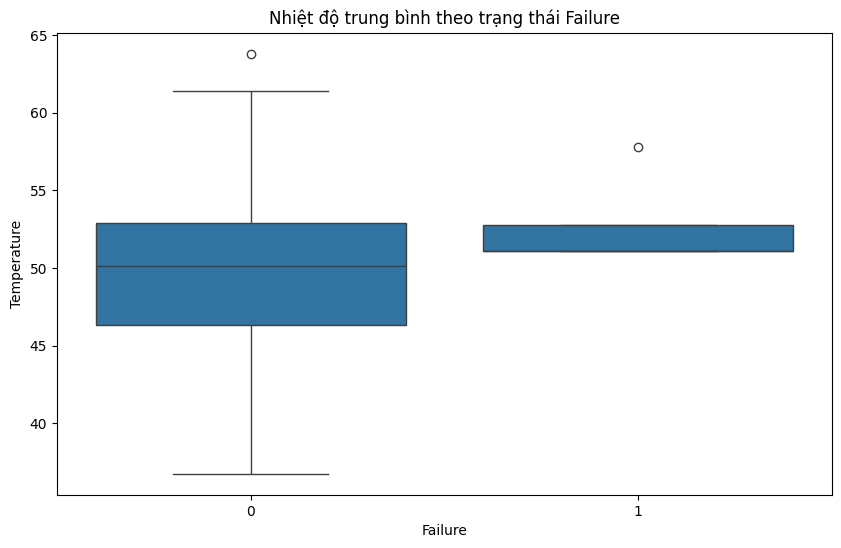

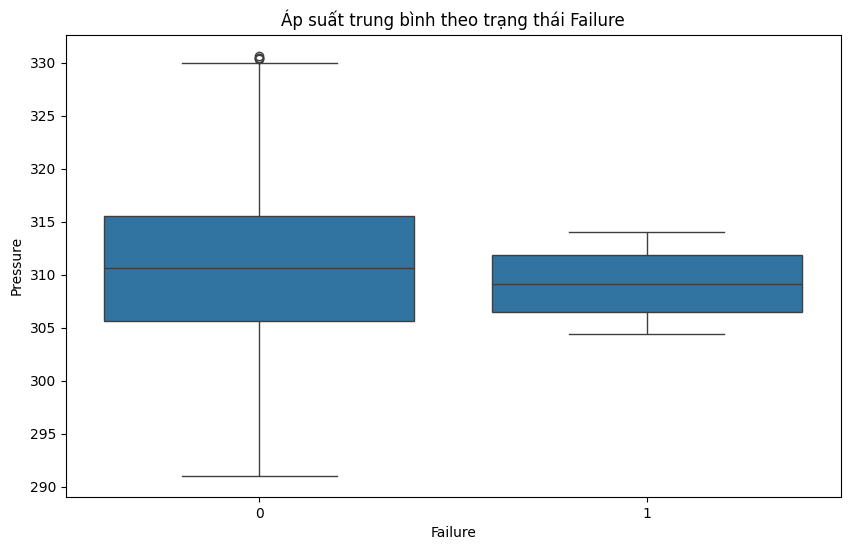

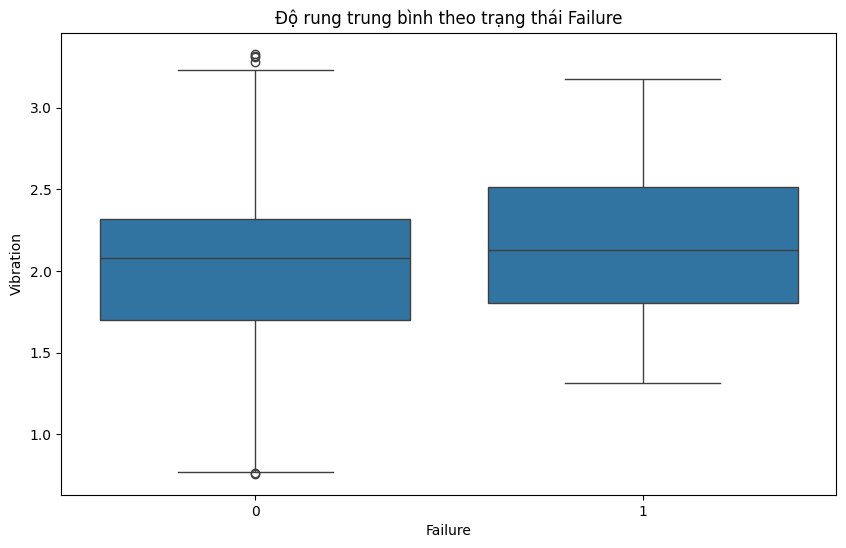

In [7]:
# Liên hệ giữa Failure và các biến số
plt.figure(figsize=(10,6))
sns.boxplot(x='Failure', y='Temperature', data=df)
plt.title('Nhiệt độ trung bình theo trạng thái Failure')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Failure', y='Pressure', data=df)
plt.title('Áp suất trung bình theo trạng thái Failure')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Failure', y='Vibration', data=df)
plt.title('Độ rung trung bình theo trạng thái Failure')
plt.show()

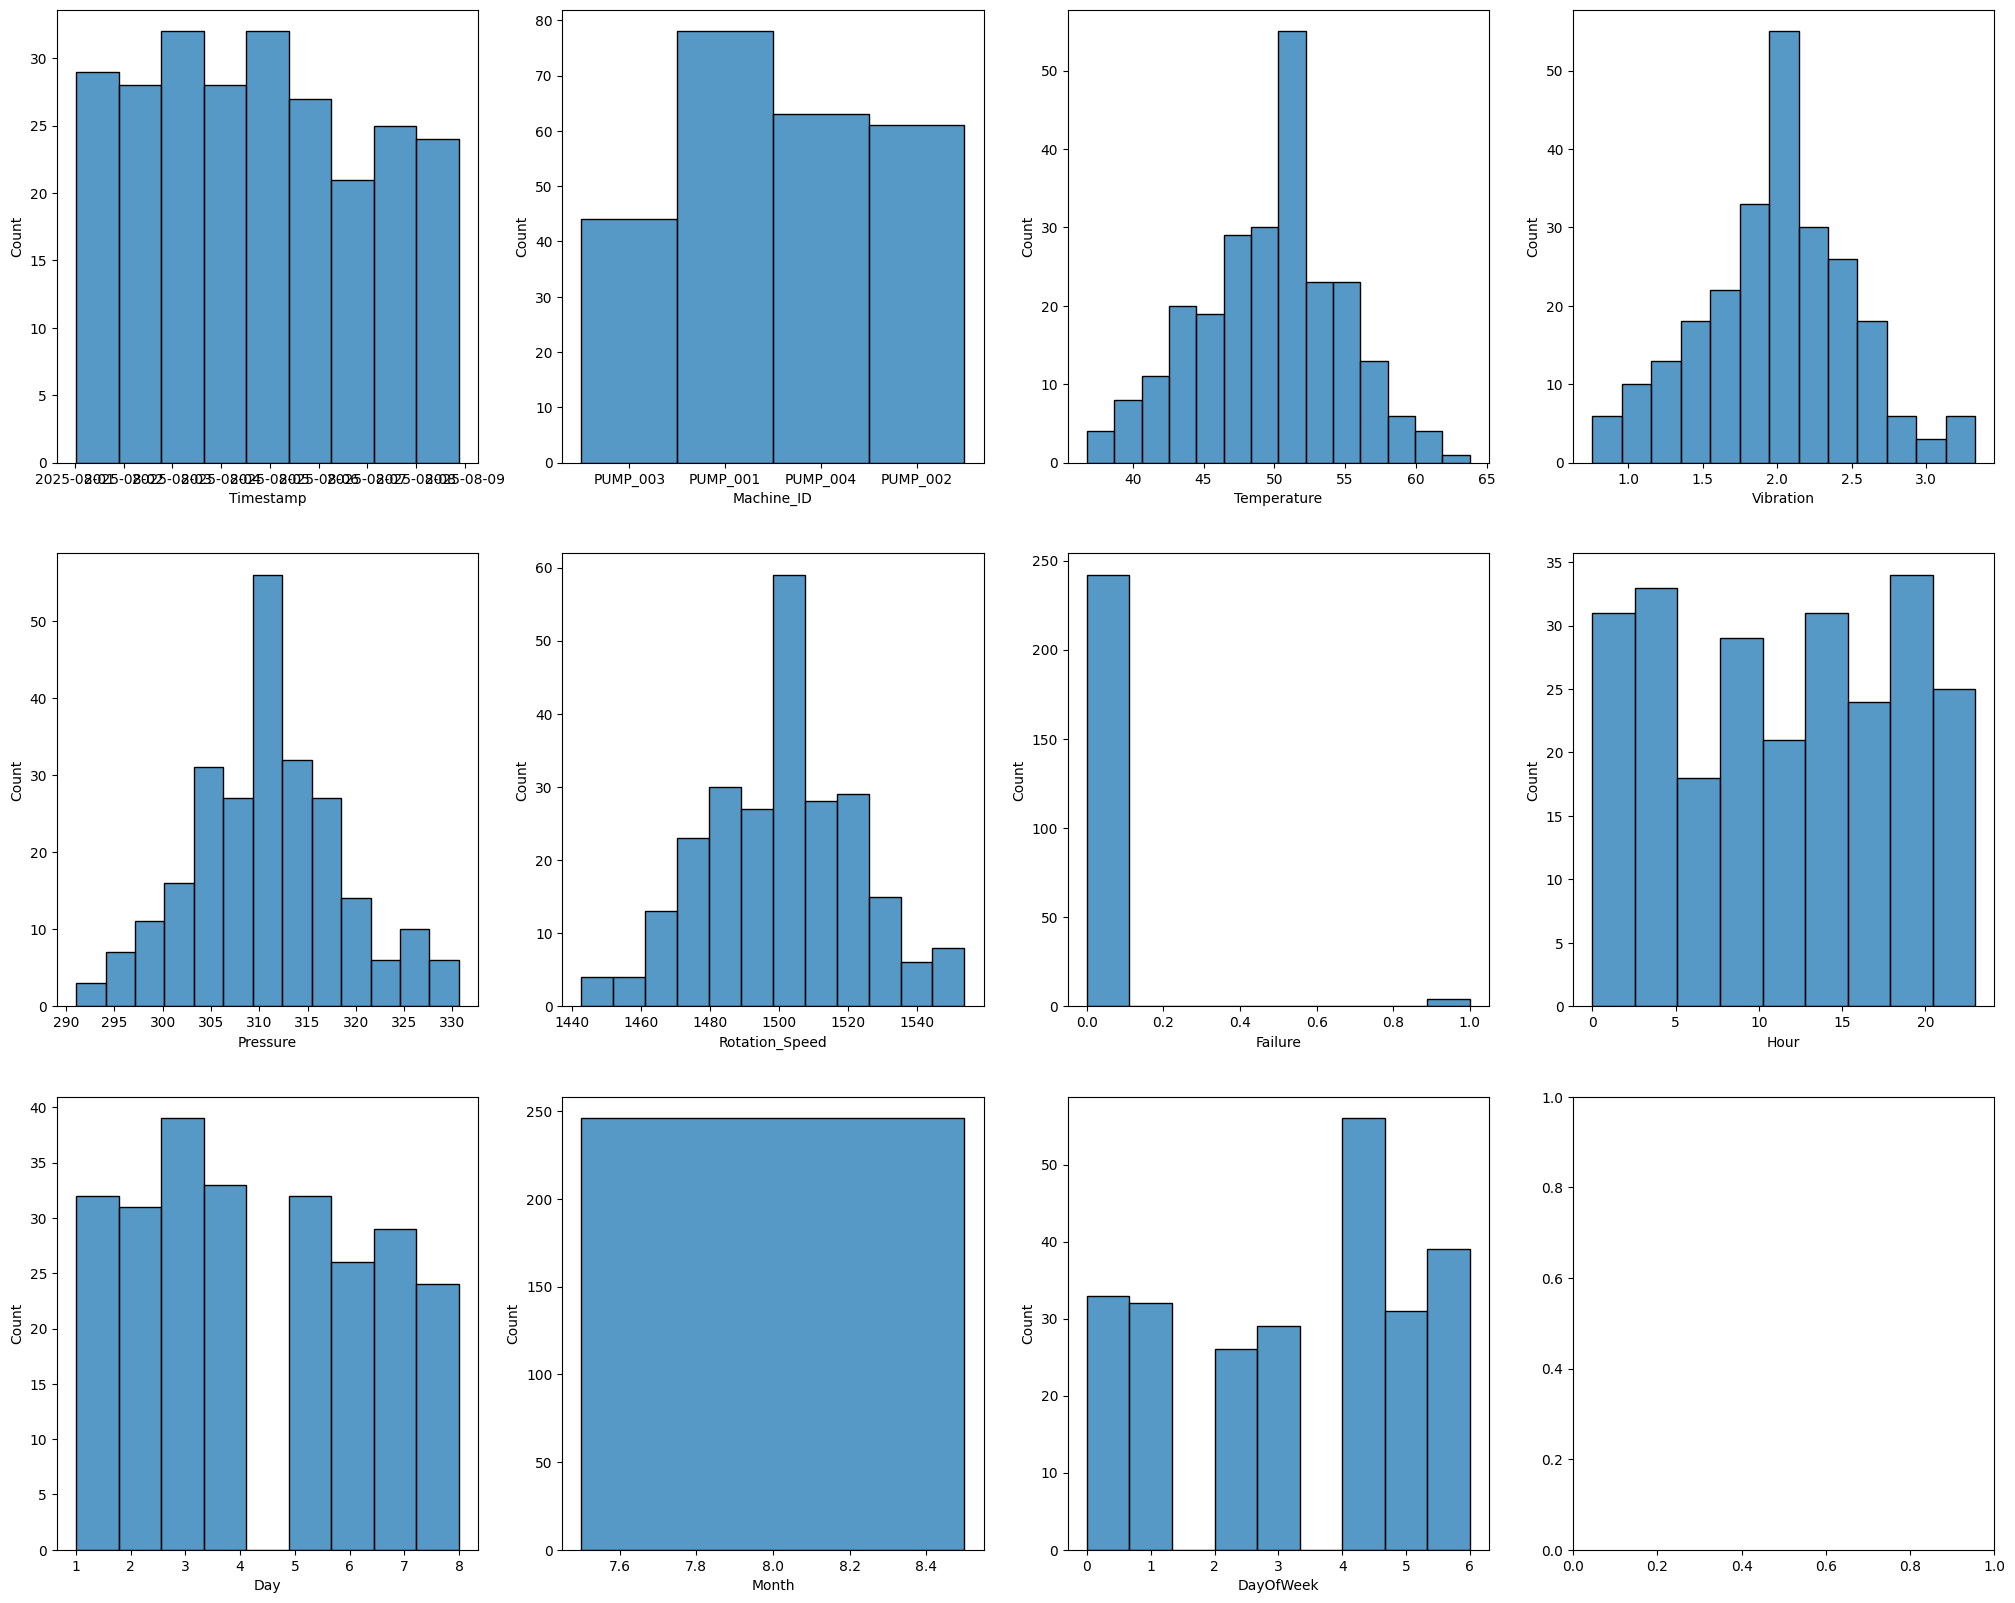

In [9]:
#check for outliers(chars)
fig, ax = plt.subplots(3, 4, figsize=(25, 20))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=ax[i//4][i%4])

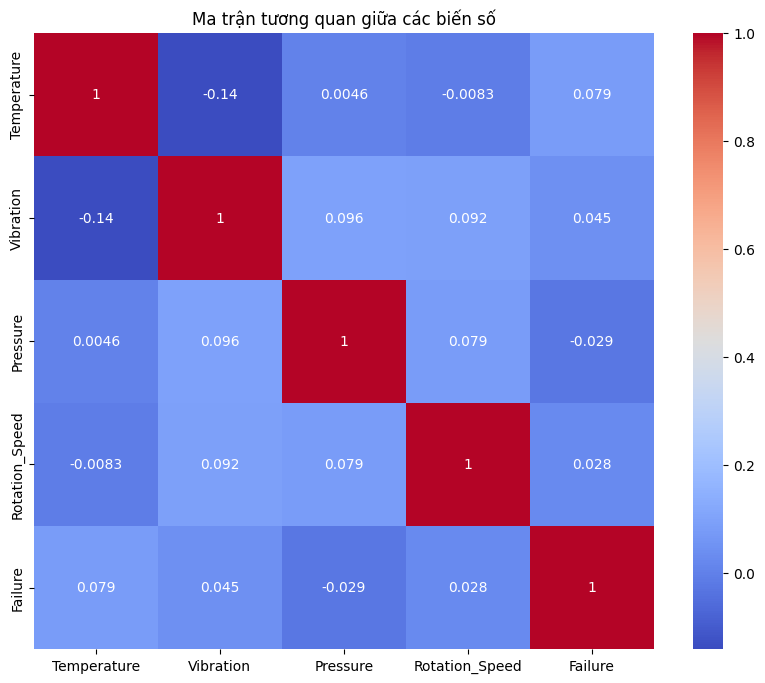

In [10]:
# Ma trận tương quan
plt.figure(figsize=(10,8))
corr = df[['Temperature','Vibration','Pressure','Rotation_Speed','Failure']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan giữa các biến số')
plt.show()

<h1 align="center"> 2. Feature Engineering</h1>


In [ ]:
df = pd.read_csv('maintenance_clean.csv', parse_dates=['Timestamp'])

In [12]:
# Lag và rolling features cho từng máy
num_cols = ['Temperature', 'Vibration', 'Pressure', 'Rotation_Speed']
window_days = [3, 7, 30]

for col in num_cols + ['Failure']:
    # Lag 1 bước 
    df[f'{col}_lag1'] = df.groupby('Machine_ID')[col].shift(1)
    # Rolling mean/min/max (trong 7 ngày gần nhất)
    df[f'{col}_mean7d'] = (
        df.groupby('Machine_ID')
          .rolling('7D', on='Timestamp')[col]
          .mean()
          .reset_index(level=0, drop=True)
    )
    df[f'{col}_max7d'] = (
        df.groupby('Machine_ID')
          .rolling('7D', on='Timestamp')[col]
          .max()
          .reset_index(level=0, drop=True)
    )
    df[f'{col}_min7d'] = (
        df.groupby('Machine_ID')
          .rolling('7D', on='Timestamp')[col]
          .min()
          .reset_index(level=0, drop=True)
    )


In [13]:
# Số lần failure trong các khoảng thời gian gần nhất
for win in window_days:
    df[f'Failure_count_{win}d'] = (
        df.groupby('Machine_ID')
          .rolling(f'{win}D', on='Timestamp')['Failure']
          .sum()
          .reset_index(level=0, drop=True)
    )

In [14]:
# Chênh lệch độ rung giữa 2 lần đo liên tiếp
df['Vibration_diff'] = df.groupby('Machine_ID')['Vibration'].diff()


In [ ]:
# Warning flag cho áp suất
df['Pressure_warn'] = (df['Pressure'] > 120).astype(int)


In [ ]:
# Encoding Machine_ID 
df['Machine_ID_enc'] = df['Machine_ID'].astype('category').cat.codes


In [21]:
# Đặc trưng chênh lệch (diff)
for col in num_cols:
    df[f'{col}_diff1'] = df.groupby('Machine_ID')[col].diff(1)

In [ ]:
# 12. Chuẩn hóa các trường số
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_cols = num_cols + [f'{col}_diff1' for col in num_cols]
df[scale_cols] = scaler.fit_transform(df[scale_cols])

In [17]:
# Xử lý missing value cho các feature mới sinh ra
df.fillna(0, inplace=True)


In [23]:
# lưu file
df.to_csv('maintenance_fe.csv', index=False)

<h1 align="center"> 3.</h1>
